In [6]:
!pip install git+https://github.com/fastai/fastai.git

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-k8e6uvd2
  Stored in directory: /tmp/pip-ephem-wheel-cache-4jbxdm4e/wheels/cf/46/39/b2d08762125ed2376861976ab2c4ac30c029b86e375735d9b8
Successfully built fastai
  Found existing installation: fastai 1.0.48
    Uninstalling fastai-1.0.48:
      Successfully uninstalled fastai-1.0.48


In [0]:
from fastai.vision import *
from fastai.imports import *
from sklearn.utils import shuffle
import imageio

In [8]:
!wget https://github.com/berndheidemann/datasets/raw/master/mnist.zip

--2019-03-12 08:34:12--  https://github.com/berndheidemann/datasets/raw/master/mnist.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/berndheidemann/datasets/master/mnist.zip [following]
--2019-03-12 08:34:13--  https://raw.githubusercontent.com/berndheidemann/datasets/master/mnist.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16054448 (15M) [application/zip]
Saving to: ‘mnist.zip.1’

mnist.zip.1         100%[===================>]  15.31M  70.9MB/s    in 0.2s    

2019-03-12 08:34:13 (70.9 MB/s) - ‘mnist.zip.1’ saved [16054448/16054448]



In [9]:
!unzip mnist.zip

Archive:  mnist.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   


In [10]:
!ls

data	   mnist.zip.1	sample_submission.csv  train.csv
mnist.zip  models	test.csv


In [0]:
df_train=pd.read_csv("./train.csv")

In [12]:
df_train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_test=pd.read_csv("./test.csv")
df_test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
labels=df_train.label
!mkdir images

In [15]:
!rm images/*

rm: cannot remove 'images/*': No such file or directory


In [0]:
images_df=df_train.drop("label", axis=1)

In [0]:
for i in range(len(df_train)):
  imageio.imwrite(f'./images/{labels.iloc[i]}_{i}.jpg', images_df.iloc[i].values.reshape((28,28)).astype('uint8'))

In [18]:
!ls images | head -4

0_10007.jpg
0_10010.jpg
0_10017.jpg
0_10032.jpg


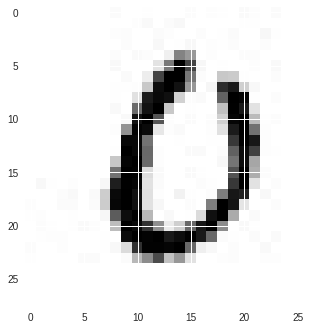

In [19]:
plt.imshow(imageio.imread("./images/0_10007.jpg"))
plt.show()

In [0]:
fnames = get_image_files("./images")
pat = r'/([^/]+)_\d+.jpg$'
tfms = get_transforms(do_flip=False)

In [21]:
data = ImageDataBunch.from_name_re("./images", fnames, pat, ds_tfms=tfms)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (33600 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
8,1,4,8,5
Path: images;

Valid: LabelList (8400 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
7,0,7,3,4
Path: images;

Test: None

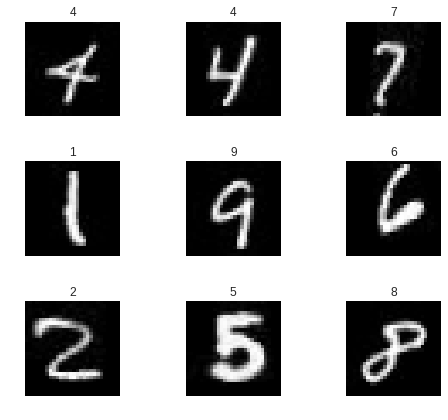

In [22]:
data.show_batch(rows=3, figsize=(7,6))

In [23]:
data.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [24]:
learn = cnn_learner(data, models.resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.torch/models/resnet18-5c106cde.pth
46827520it [00:01, 30903877.92it/s]


In [25]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.694154,0.612054,0.200000,01:18


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


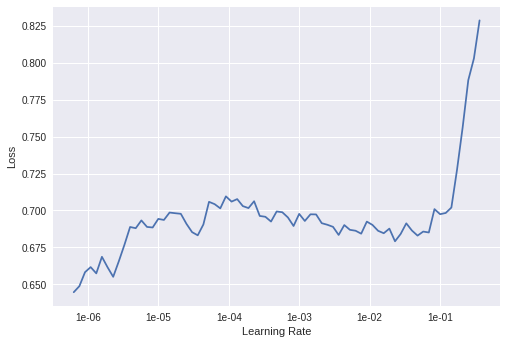

In [26]:
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-3,  1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,0.931445,0.870471,0.043929,01:20
1,0.078425,0.029658,0.007857,01:21


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


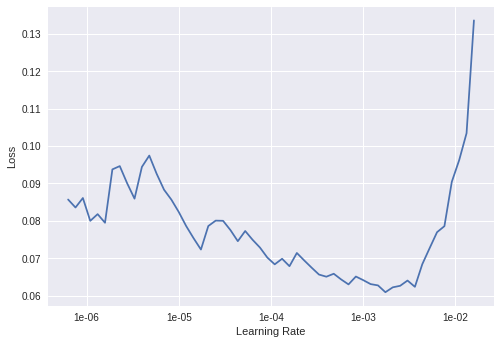

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,  1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.079434,0.026896,0.007143,01:18
1,0.059251,0.026801,0.007619,01:20
2,0.068036,0.028992,0.007619,01:20


In [0]:
interp=ClassificationInterpretation.from_learner(learn)

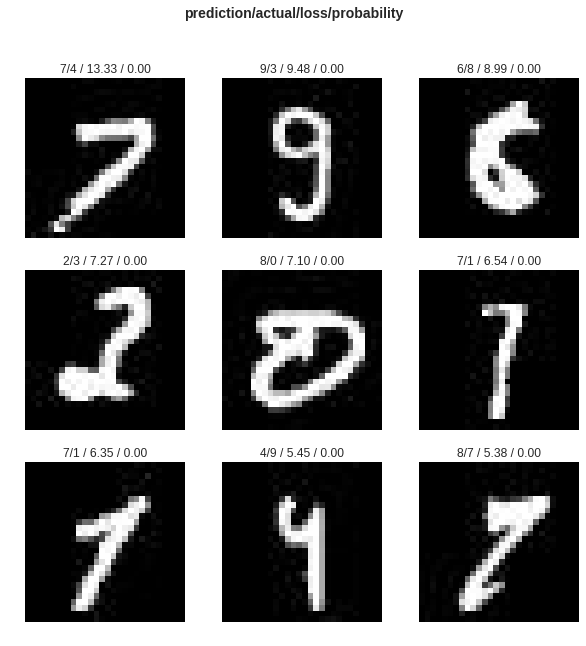

In [33]:
interp.plot_top_losses(9, figsize=(10, 10))

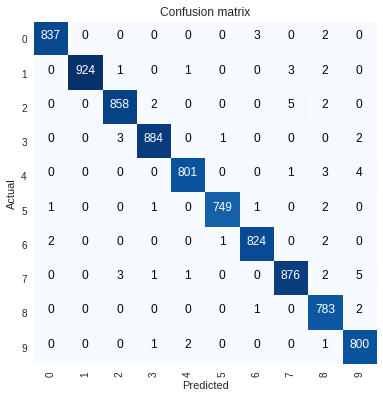

In [34]:
interp.plot_confusion_matrix()

In [35]:
interp.most_confused(min_val=2)

[('2', '7', 5),
 ('7', '9', 5),
 ('4', '9', 4),
 ('0', '6', 3),
 ('1', '7', 3),
 ('3', '2', 3),
 ('4', '8', 3),
 ('7', '2', 3),
 ('0', '8', 2),
 ('1', '8', 2),
 ('2', '3', 2),
 ('2', '8', 2),
 ('3', '9', 2),
 ('5', '8', 2),
 ('6', '0', 2),
 ('6', '8', 2),
 ('7', '8', 2),
 ('8', '9', 2),
 ('9', '4', 2)]

In [0]:
test_images_df=df_test
!mkdir test_images
for i in range(len(test_images_df)):
  imageio.imwrite(f'./test_images/{i}.jpg', test_images_df.iloc[i].values.reshape((28,28)).astype('uint8'))

In [37]:
!ls test_images | head -4

0.jpg
10000.jpg
10001.jpg
10002.jpg


In [0]:
test_filenames=get_image_files("./test_images")
test_data= ImageDataBunch.from_lists(path="./test_images",fnames=test_filenames, labels=[1]*len(test_filenames), test='test')

In [0]:
preds=learn.predict(open_image("./test_images/2.jpg"))

In [40]:
preds[0]

Category 9

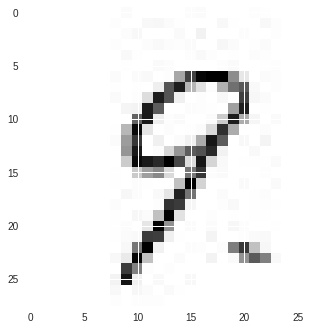

In [41]:
plt.imshow(imageio.imread("./test_images/2.jpg"))
plt.show()